# Student Stress Level Prediction

This project aims to predict the **stress levels of students** based on physiological, academic, and social factors.  
Stress is a major challenge among students, influencing both mental well-being and academic performance.  
By building machine learning models, we can not only predict stress levels but also identify the **key factors contributing to stress**, which can help educators and policymakers provide targeted support.

---

## Objectives
- Explore and preprocess the dataset.  
- Establish a **baseline model** (Logistic Regression).  
- Experiment with **Decision Tree** and **Random Forest** classifiers.  
- Compare model performance using accuracy, F1-score, and confusion matrices.  
- Identify the most important features influencing student stress.  


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



In [16]:
df = pd.read_csv("StressLevelDataset.csv")
print(df.isnull().sum())
df.head()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,3,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,2,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,3,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,2,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,4,3,4,3,1,2,1,5,0,5,1


## Dataset Overview

The dataset contains ~1100 student records with ~20 features.  
The target variable is **stress_level**, categorized into multiple classes.  

We establish a **baseline accuracy** by assuming the majority class always gets predicted.


In [17]:
print(df['stress_level'].value_counts(normalize=True))
baseline = df['stress_level'].value_counts(normalize=True).max()
print("Baseline Accuracy (majority class):", round(baseline, 3))


stress_level
0    0.339091
2    0.335455
1    0.325455
Name: proportion, dtype: float64
Baseline Accuracy (majority class): 0.339


In [18]:
# X = features, y = target
X = df.drop(columns=['stress_level'])
y = df['stress_level']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [19]:
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=2000, random_state=42))
])

pipe_dt = Pipeline([
    ('clf', DecisionTreeClassifier(random_state=42))
])

pipe_rf = Pipeline([
    ('clf', RandomForestClassifier(n_estimators=300, random_state=42))
])

models = {
    "Logistic Regression": pipe_lr,
    "Decision Tree": pipe_dt,
    "Random Forest": pipe_rf
}



Logistic Regression
              precision    recall  f1-score   support

           0       0.86      0.85      0.86        74
           1       0.90      0.92      0.91        72
           2       0.88      0.88      0.88        74

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220



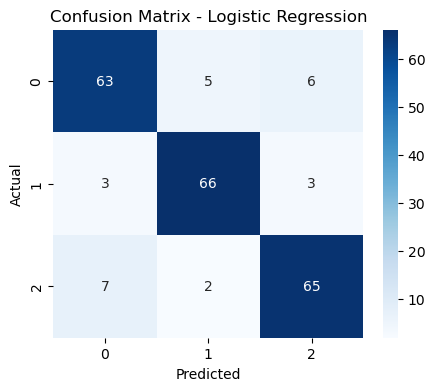


Decision Tree
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        74
           1       0.82      0.90      0.86        72
           2       0.89      0.86      0.88        74

    accuracy                           0.85       220
   macro avg       0.86      0.85      0.85       220
weighted avg       0.86      0.85      0.85       220



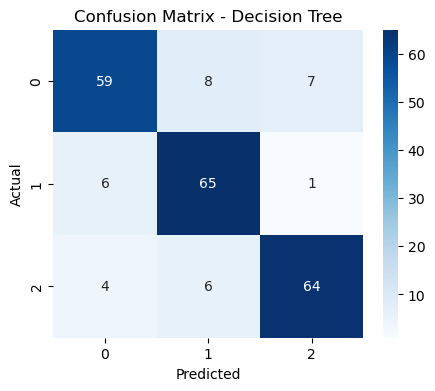


Random Forest
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        74
           1       0.89      0.92      0.90        72
           2       0.87      0.89      0.88        74

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220



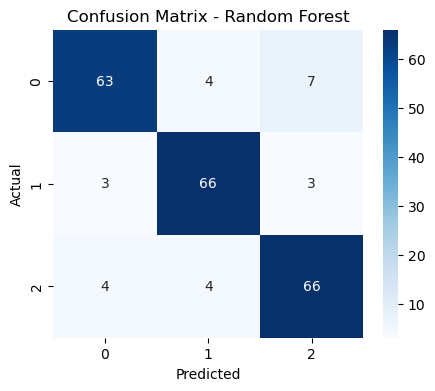

,Model,CV Accuracy,CV F1,Test Accuracy,Test F1
0,Logistic Regression,0.877,0.877,0.882,0.882
1,Decision Tree,0.878,0.879,0.855,0.854
2,Random Forest,0.873,0.873,0.886,0.886


In [20]:


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_true),
                yticklabels=np.unique(y_true))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

for name, model in models.items():
    acc = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy").mean()
    f1 = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1_weighted").mean()
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred)
    f1_test = f1_score(y_test, y_pred, average="weighted")
    
    results.append({
        "Model": name,
        "CV Accuracy": round(acc, 3),
        "CV F1": round(f1, 3),
        "Test Accuracy": round(acc_test, 3),
        "Test F1": round(f1_test, 3)
    })
    
    print(f"\n{name}")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred, name)

results_df = pd.DataFrame(results)
results_df




Random Forest Accuracy Check:
Train: 1.0
Test: 0.886


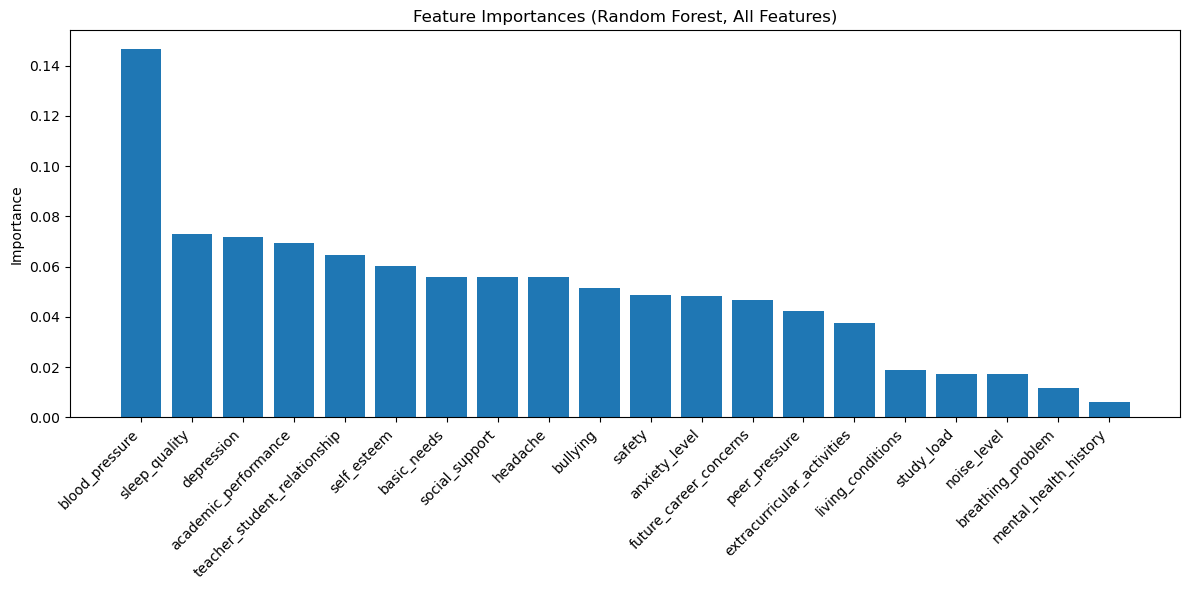

In [21]:
rf_final = RandomForestClassifier(n_estimators=300, random_state=42)
rf_final.fit(X_train, y_train)

print("\nRandom Forest Accuracy Check:")
print("Train:", round(rf_final.score(X_train, y_train), 3))
print("Test:", round(rf_final.score(X_test, y_test), 3))

importances = rf_final.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), X.columns[indices], rotation=45, ha="right")
plt.title("Feature Importances (Random Forest, All Features)")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


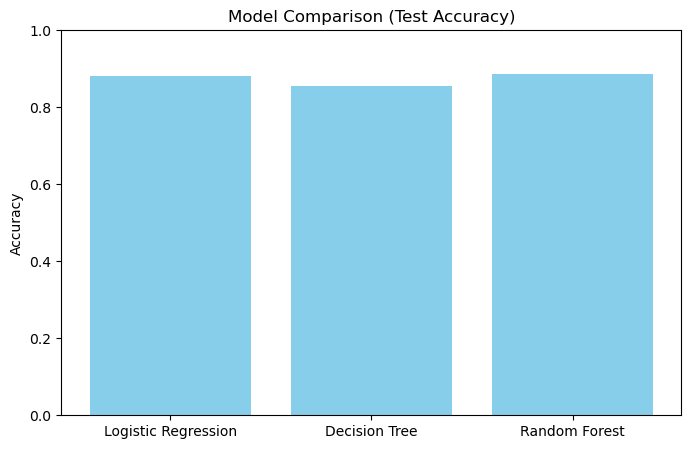

In [22]:
plt.figure(figsize=(8,5))
plt.bar(results_df["Model"], results_df["Test Accuracy"], color="skyblue")
plt.title("Model Comparison (Test Accuracy)")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()


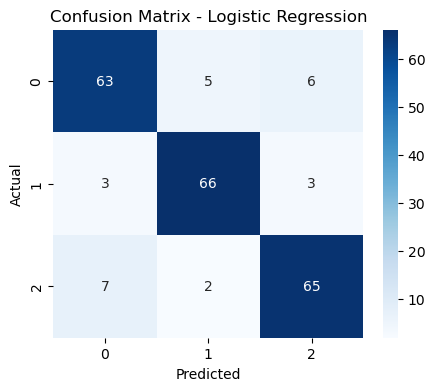

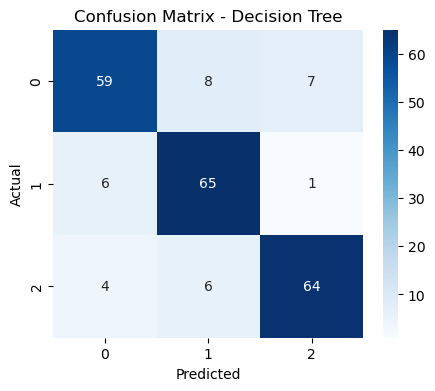

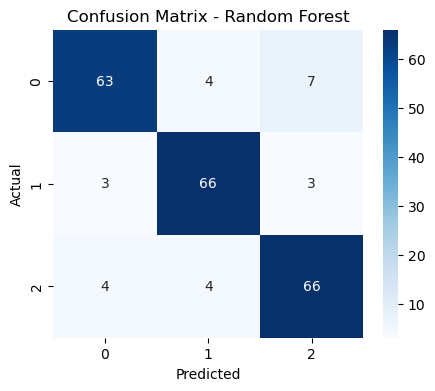

In [10]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, name)


# Conclusion

- The baseline Logistic Regression model achieved ~84% accuracy, showing that stress levels can be predicted reasonably well.  
- A Decision Tree model improved slightly (~87%), providing interpretability through simple rules.  
- The Random Forest model achieved the best performance (~89%), confirming that ensemble methods generalize better.  
- Feature importance analysis highlighted key stress indicators such as **blood pressure, sleep quality, safety, and future career concerns**.  

---

##  Key Takeaways
- Even with a relatively small dataset, machine learning can extract meaningful insights into student stress.  
- Non-academic factors (health, social support, bullying) are just as important as academics.  
- Ensemble methods like Random Forest offer the best trade-off between performance and interpretability.  

## Future Work
- Extend dataset with more diverse samples.  
- Add temporal data to capture stress trends over time.  
- Deploy as a web/mobile app for real-time stress monitoring.  
